# 1. Importing Libraries

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 2. Reading Data

In [6]:
data='http://bit.ly/w-data'
df=pd.read_csv(data)
dataset = pd.read_csv('data_code.csv')

# 3. Data Exploration

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
df.shape

(25, 2)

# 4. EDA

[]

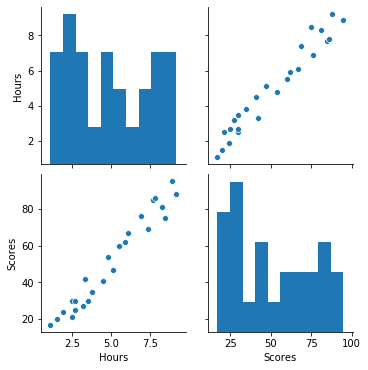

In [11]:
sns.pairplot(df) #to check whether it is a linear regression
plt.plot()

Text(0.5, 1.0, 'Hours vs Percentage Scored')

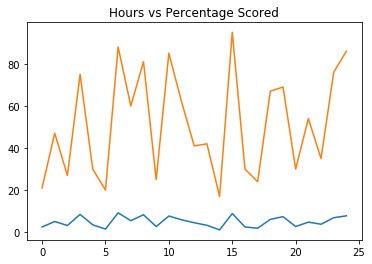

In [13]:
plt.plot(df)
plt.title("Hours vs Percentage Scored")

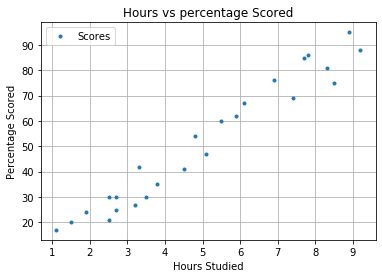

In [14]:
#plotting the relationship between hours studied and percentage scored
df.plot(x = 'Hours',y = 'Scores', style='.')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.title('Hours vs percentage Scored')
plt.grid()

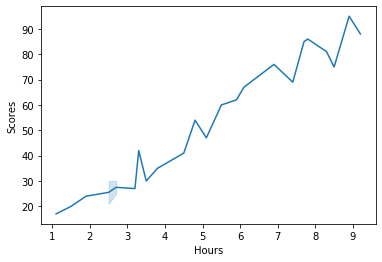

In [15]:
sns.lineplot(df['Hours'],df['Scores'])  #positive linear regression

# 5. Data Preparation

In [16]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

# 6. Module Building

In [17]:
from sklearn.model_selection import train_test_split #to split this data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression
l_reg=LinearRegression()
l_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print('Training Score: ', round(l_reg.score(X_train,y_train)*100,2),'%')
print('Testing Score: ', round(l_reg.score(X_test,y_test)*100,2),'%')

Training Score:  94.85 %
Testing Score:  93.68 %


# 7. Regresion Line

In [20]:
m = l_reg.coef_   #linear regression line slope
c = l_reg.intercept_  #linear regression line y-intercept

Text(0, 0.5, 'Percentage scored')

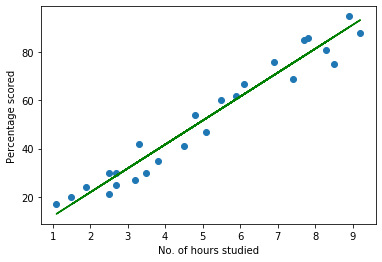

In [21]:
#Plotting the regression line on training data
predicted_line = (m*X) + c
plt.scatter(X,y)
plt.plot(X, predicted_line, c='green');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")

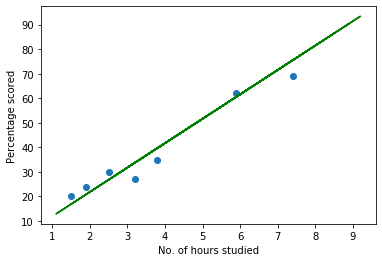

In [22]:
#Plotting the regression line on test data
predicted_line = (m*X) + c
plt.scatter(X_test,y_test)
plt.plot(X, predicted_line, c='green');
plt.xlabel("No. of hours studied")
plt.ylabel("Percentage scored")
plt.show()

# 8. Prediction 

In [23]:
y_predict=l_reg.predict(X_test)
y_predict

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [24]:
from sklearn import metrics
acc=metrics.r2_score(y_test,y_predict)
print("Accuracy Score of Model: ",round(acc*100,2),'%')

Accuracy Score of Model:  93.68 %


# 9. Comparison

In [25]:
prediction_df = pd.DataFrame({ 'Actual Scores': y_test, 'Predicted Scores': y_predict})  
prediction_df

,Actual Scores,Predicted Scores
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


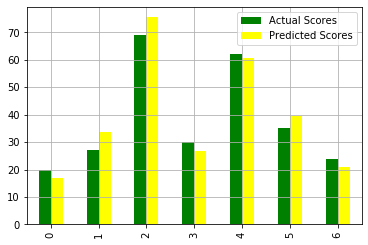

In [26]:
prediction_df.plot(kind='bar',color=['green','yellow'])
plt.grid()

In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_predict))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('Explained Variance Score:',metrics.explained_variance_score(y_test,y_predict))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055
Explained Variance Score: 0.9398737229250631


In [28]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
new_pred = l_reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341655


#  10. Creating a Function 

In [29]:
def score_prediction():
    """This function predicts the percentage scored by a student based on the hours studied."""
    x=float(input('Enter hours studied to predict scores: '))
    hours = x
    test = np.array([hours])
    test = test.reshape(-1, 1)
    new_pred = l_reg.predict(test)
    print('\n')
    print("No of Hours = {}".format(hours))
    print("Score Predicted = {}".format(round(new_pred[0]),2))

In [31]:
score_prediction()

Enter hours studied to predict scores: 9.25


No of Hours = 9.25
Score Predicted = 94.0


# 11. Result

In [ ]:
The Predicted score if a student studies for 9.25 hrs/ day is 94.0